In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/g.s.rajsankar/Desktop/PYTHON & ML/Python,ML & DL regex/My workings on ML class/Medical insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 432x432 with 0 Axes>

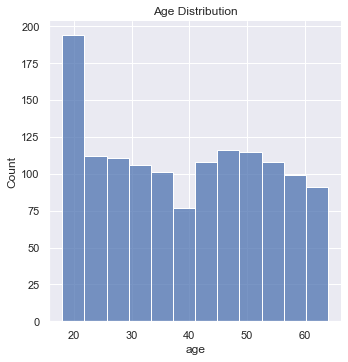

In [7]:
sns.set()
plt.figure(figsize = (6,6))
# sns.distplot(df.age)   # distplot will get deprecated in future versions. 
# sns.distplot(df['age'])

sns.displot(x='age',data=df)
plt.title('Age Distribution')
plt.show()

#OR (for plotting)

<Figure size 432x432 with 0 Axes>

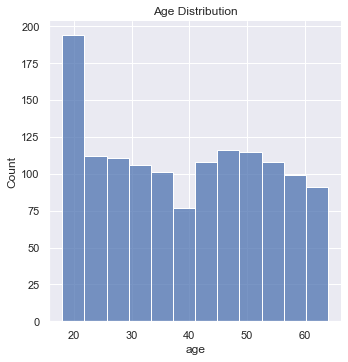

In [8]:
plt.figure(figsize = (6,6))
sns.displot(df.age)
plt.title('Age Distribution')
plt.show()

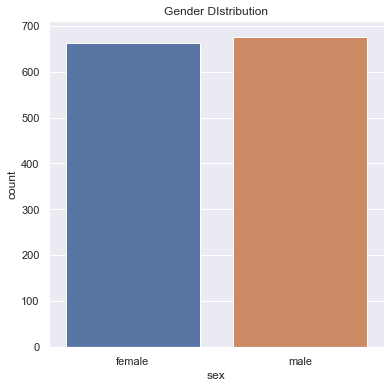

In [9]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex',data = df)
plt.title("Gender DIstribution")
plt.show()

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

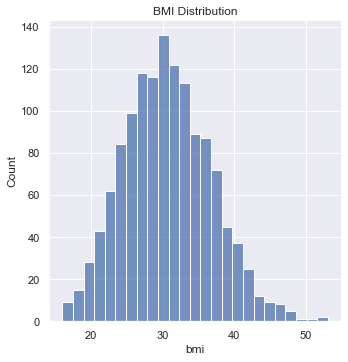

In [11]:
# BMI DIstribution
plt.figure(figsize = (6,6))
sns.displot(x='bmi',data=df)
plt.title('BMI Distribution')
plt.show()

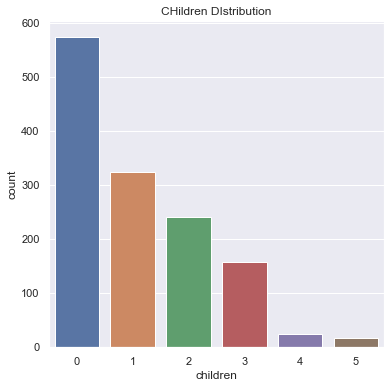

In [12]:
# Children Distribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'children',data = df)
plt.title("CHildren DIstribution")
plt.show()

In [13]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

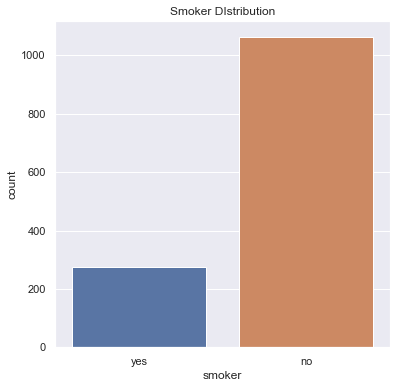

In [14]:
# Smoker Distribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker',data = df)
plt.title("Smoker DIstribution")
plt.show()

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

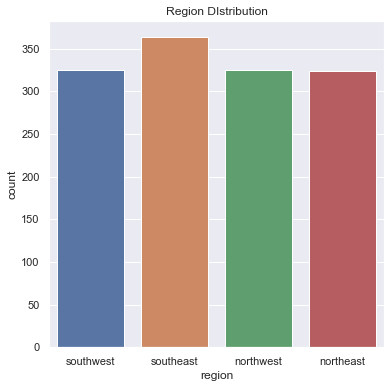

In [16]:
# Region Distribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'region',data = df)
plt.title("Region DIstribution")
plt.show()

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

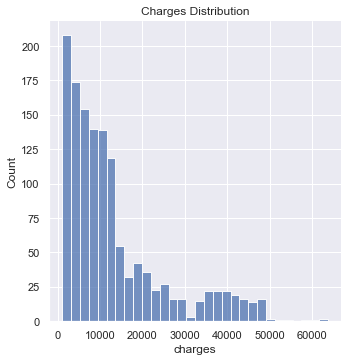

In [18]:
# Target DIstribution
plt.figure(figsize = (6,6))
sns.displot(df.charges)
plt.title('Charges Distribution')
plt.show()

In [19]:
#ENcoding the Categorical Features

In [20]:
df.replace({'sex': {'male' : 0, 'female': 1}}, inplace = True)
df.head()

#or
#df['sex'] = df['sex'].replace({'male':0,'female':1},inplace = True)
#df.....(applies for all)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [21]:
df.replace({'smoker': {'no' : 0, 'yes': 1}}, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [22]:
df.replace({'region': {'southeast' : 0, 'southwest': 1, 'northeast': 2, 'northwest':3}}, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [23]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [24]:
# [: -> all rows and :-1 -> all columns expect the last one]
#[:,-1 -> only the last one]
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [25]:
X

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  0.  , 33.77,  1.  ,  0.  ,  0.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  0.  ,  0.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  0.  ,  0.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  0.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [26]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[4])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
X

array([[ 0.  ,  1.  , 19.  , ..., 27.9 ,  0.  ,  1.  ],
       [ 1.  ,  0.  , 18.  , ..., 33.77,  1.  ,  0.  ],
       [ 1.  ,  0.  , 28.  , ..., 33.  ,  3.  ,  0.  ],
       ...,
       [ 1.  ,  0.  , 18.  , ..., 36.85,  0.  ,  0.  ],
       [ 1.  ,  0.  , 21.  , ..., 25.8 ,  0.  ,  1.  ],
       [ 0.  ,  1.  , 61.  , ..., 29.07,  0.  ,  3.  ]])

# Applying Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [29]:
reg.coef_

array([-11933.52934356,  11933.52934356,    256.96796596,    128.95608532,
          337.0245187 ,    468.35404686,    297.83720698])

In [30]:
reg.intercept_

-1103.1236243459916

In [31]:
reg.score(X,Y)

0.7504397033719741

In [32]:
result=reg.predict(X)

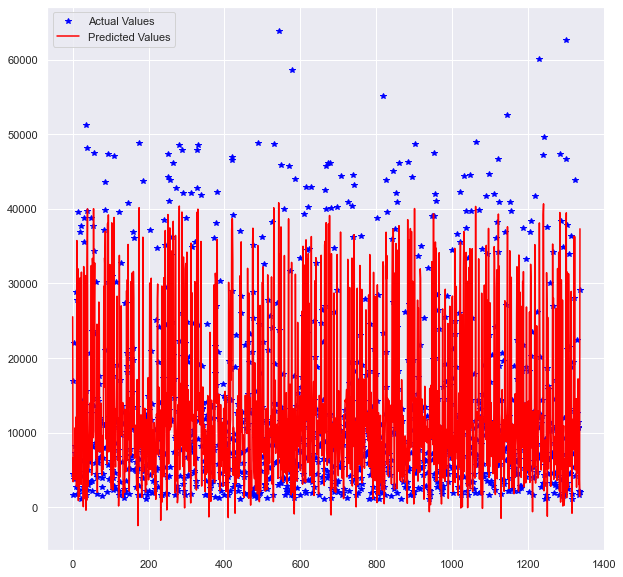

In [33]:
plt.figure(figsize=(10,10))
plt.plot(Y,'*',color='blue',label='Actual Values')
plt.plot(result, color = 'red', label = 'Predicted Values')
plt.legend()

In [34]:
test_df=pd.DataFrame()
test_df['Actual Values']=Y
test_df['Predicted_values']=result
test_df

,Actual Values,Predicted_values
0,16884.92400,25542.574436
1,1725.55230,3438.442463
2,4449.46200,6685.321337
3,21984.47061,3988.943227
4,3866.85520,5813.101664
...,...,...
1333,10600.54830,12547.968436
1334,2205.98080,3071.223555
1335,1629.83350,4137.080019
1336,2007.94500,1481.700192


# another way by using train test split

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
X = df.drop(columns = 'charges', axis = 1)
y = df.charges

In [37]:
X.shape, y.shape

((1338, 6), (1338,))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

# Model Training

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
# Evaluate on Train Set
pred_train = lr.predict(X_train)

In [42]:
# R Squared
r2_train = metrics.r2_score(y_train, pred_train)
print("train accuracy :",r2_train)

train accuracy : 0.7413131194887537


In [43]:
# R Squared
r2_train = metrics.r2_score(y_train, pred_train)
print(r2_train)

0.7413131194887537


In [44]:
# Evaluate on Test Set
pred_test = lr.predict(X_test)

# R Squared
r2_test = metrics.r2_score(y_test, pred_test)
print("test accuracy : ",r2_test)

test accuracy :  0.783021587162344
